<a href="https://colab.research.google.com/github/andrejet55/aviation_english/blob/main/Aviation_code_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aviation code base

### Libraries

In [1]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import os
import numpy as np

In [5]:
!pip install resampy

In [6]:
import resampy

### Define a function to extract features

In [2]:
for file in os.listdir('/content/drive/MyDrive/Aviation/data/'):
    print(file)

Avalinguo - Dana and Konay segment 2 - D
Avalinguo - Dana and Konay segment 1 - D
Avalinguo - Dana and Konay segment 4 - D


In [4]:
def feature_extraction(file_path):
    # load the audio file
    x, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    # extract features from the audio
    mfcc = np.mean(librosa.feature.mfcc(y=x, sr=sample_rate, n_mfcc=50).T, axis=0)

    return mfcc

In [7]:
features = {}
directory = '/content/drive/MyDrive/Aviation/data/'
for audio in os.listdir(directory):
    audio_path = directory+audio
    features[audio_path] = feature_extraction(audio_path)

In [3]:
ipd.Audio('/content/drive/MyDrive/Aviation/data/Avalinguo - Dana and Konay segment 1 - D')

### extract features
using the feature_extraction function defined earlier from multiple audio files within a specified directory.

In [8]:
audio_path

'/content/drive/MyDrive/Aviation/data/Avalinguo - Dana and Konay segment 4 - D'

### retrieve the extracted features for a specific audio file

In [9]:
features[audio_path], len(features[audio_path])

(array([-3.9578848e+02,  1.0028758e+02,  1.3514342e+01,  2.9449450e+01,
         1.1692918e+01,  1.2091401e+01,  7.8115230e+00,  1.5079754e+01,
        -1.7543539e+00,  9.9133501e+00, -6.6265087e+00,  8.3340979e+00,
        -4.2883067e+00,  3.2993302e+00, -6.8149275e-01,  3.8668570e-01,
        -5.3826313e+00,  2.9177952e+00, -5.0689645e+00,  3.2864809e+00,
        -1.3156039e+00,  1.7528559e+00,  1.4016138e+00, -9.1308057e-01,
        -3.7891378e+00, -1.9527570e+00, -4.4953585e+00, -2.3183303e+00,
        -6.6169441e-01, -2.1572778e+00,  3.5800509e+00,  2.5331070e+00,
         6.4236565e+00,  7.9482393e+00,  5.1835971e+00,  5.3471456e+00,
         1.1534522e+00, -2.4342916e+00,  2.4418576e-01, -1.0850905e+00,
         1.4480256e+00, -7.8343916e-01, -2.1559689e+00, -1.0290990e+00,
        -3.9935657e-01, -1.3121911e+00,  9.9454813e-02, -3.4740191e+00,
        -1.4185590e+00, -1.5526453e+00], dtype=float32),
 50)

### Visualize Spectogram

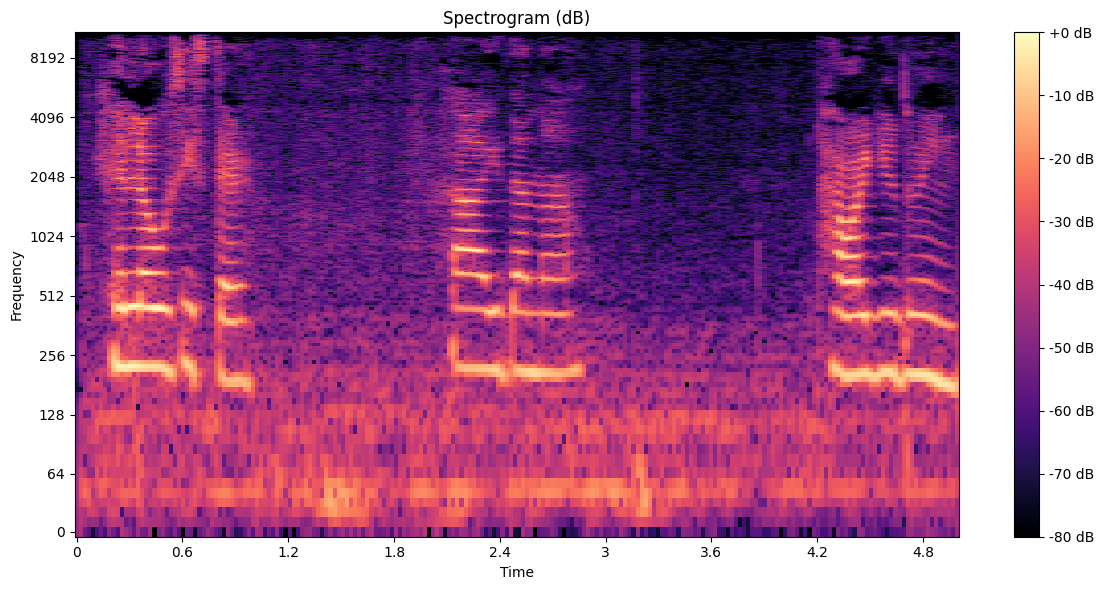

In [10]:
# Path to your audio file
file_path = '/content/drive/MyDrive/Aviation/data/Avalinguo - Dana and Konay segment 1 - D'

# Load the audio file
y, sr = librosa.load(file_path)

# Compute the Short-Time Fourier Transform (STFT)
D = librosa.stft(y)

# Convert amplitude to decibels
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

# Plot the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (dB)')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()